# Project: Investigating Gapminder dataset

## Table of Contents
<ul>
1.<a href="#intro">Introduction</a>

2.<a href="#wrangling">Data Wrangling</a>
    
3.<a href="#eda">Exploratory Data Analysis</a>
    
3.1 <a href="#rq1">Research Question 1</a>
    
3.2 <a href="#rq2">Research Question 2</a>
    
3.3 <a href="#rq3">Research Question 3</a>
    
3.4 <a href="#rq4">Research Question 4</a>
    
4.<a href="#conclusions">Conclusions</a>
</ul>

<a id='intro'></a>
## Introduction

I have choosen Gapminder dataset having variety of datasets.The datasets include GDP, Population, population density, education, health, unemployment, mortality informations.

I have selected GDP as my dependent variable and population , Life expectancy and unemployment as independent variables.

The research question which this report would be dealing with are

>1.Top 10 contributors of GDP to world economy from 2000 - 2019
>
>2.Understanding top 10 country's population% in 2019 vs gdp % in 2019
>
>3.Understanding Relationship between GDP and Life expectancy in United States from year 2000-2019
>
>4.Understanding Relationship between GDP and Unemployment in United States from year 2000-2019



In [3]:
# Importing packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [4]:
# Loading the inputs files

gdp = pd.read_csv('total_gdp_us_inflation_adjusted.csv')
pop = pd.read_csv('population_total.csv')
life_expectancy = pd.read_csv('life_expectancy_years.csv')
unemp_rate = pd.read_csv('long_term_unemployment_rate_percent.csv')

## Data Cleaning 

### Step 1: Filtering the data from 2000 - 2019

In [5]:
# For gdp data from 2000 - 2009 and converting it into billions
gdp_f = gdp.iloc[:,np.r_[0,gdp.columns.get_loc('2000'):gdp.columns.get_loc('2019')+1]]
gdp_f.loc[:,'2000':'2019'] = gdp_f.loc[:,'2000':'2019']/1000000000


# Extracting population data from 2000 -2019
pop_f = pop.iloc[:,np.r_[0,pop.columns.get_loc('2000'):pop.columns.get_loc('2019')+1]]

#Extracting life expectancy data from 2000 -2019
life_expectancy_f = life_expectancy.iloc[:,np.r_[0,life_expectancy.columns.get_loc('2000'):life_expectancy.columns.get_loc('2019')+1]]

##Extracting Unemployment data from 2000 -2019
unemp_rate_f = unemp_rate.iloc[:,np.r_[0,unemp_rate.columns.get_loc('2000'):unemp_rate.columns.get_loc('2017')+1]] # This is present till 2017

/Users/ritujain/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
# Saving the extracted CSVs 
gdp_f.to_csv('gdp_f.csv' , index = False)
pop_f.to_csv('pop_f.csv' , index = False)
life_expectancy_f.to_csv('life_expectancy_f.csv' , index = False)
unemp_rate_f.to_csv('unemp_rate_f.csv' , index = False)

In [7]:
gdp_f.shape , pop_f.shape, life_expectancy_f.shape, unemp_rate_f.shape

((191, 21), (195, 21), (187, 21), (122, 19))

### Step 2: Handling null

In [8]:
# checking null status in population dataframe
pop_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  195 non-null    object
 1   2000     195 non-null    int64 
 2   2001     195 non-null    int64 
 3   2002     195 non-null    int64 
 4   2003     195 non-null    int64 
 5   2004     195 non-null    int64 
 6   2005     195 non-null    int64 
 7   2006     195 non-null    int64 
 8   2007     195 non-null    int64 
 9   2008     195 non-null    int64 
 10  2009     195 non-null    int64 
 11  2010     195 non-null    int64 
 12  2011     195 non-null    int64 
 13  2012     195 non-null    int64 
 14  2013     195 non-null    int64 
 15  2014     195 non-null    int64 
 16  2015     195 non-null    int64 
 17  2016     195 non-null    int64 
 18  2017     195 non-null    int64 
 19  2018     195 non-null    int64 
 20  2019     195 non-null    int64 
dtypes: int64(20), object(1)
memory usage: 3

In [9]:
# checking for duplicated rows in population dataframe
pop_f.duplicated().sum()

# 0 duplicates, 0 null records and correctly assigned datatypes making population dataframe a clean one

0

In [10]:
# checking null status in gdp dataframe
df_gdp = pd.read_csv('gdp_f.csv')
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  191 non-null    object 
 1   2000     185 non-null    float64
 2   2001     186 non-null    float64
 3   2002     187 non-null    float64
 4   2003     187 non-null    float64
 5   2004     188 non-null    float64
 6   2005     188 non-null    float64
 7   2006     188 non-null    float64
 8   2007     188 non-null    float64
 9   2008     189 non-null    float64
 10  2009     189 non-null    float64
 11  2010     191 non-null    float64
 12  2011     189 non-null    float64
 13  2012     188 non-null    float64
 14  2013     188 non-null    float64
 15  2014     188 non-null    float64
 16  2015     187 non-null    float64
 17  2016     186 non-null    float64
 18  2017     186 non-null    float64
 19  2018     185 non-null    float64
 20  2019     174 non-null    float64
dtypes: float64(20), 

> Drop the rows with total nulls more than or equal to 5

In [11]:
gdp_rows_to_be_dropped = df_gdp[df_gdp.isnull().sum(axis = 1) >=  5]
gdp_rows_to_be_dropped.index , gdp_rows_to_be_dropped.shape

(Int64Index([47, 54, 97, 157, 186], dtype='int64'), (5, 21))

In [12]:
# dropping the identified rows

df_gdp.drop(index = gdp_rows_to_be_dropped.index , axis = 1 , inplace = True)

In [13]:
# saving the intermedite csv

df_gdp.to_csv('gdp_f1.csv' , index = False)

In [14]:
df_gdp = pd.read_csv('gdp_f1.csv')
df_gdp.shape 

(186, 21)

In [15]:
# Checking datatypes in above
df_gdp.dtypes

# All columns have correct datatypes

country     object
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object

In [16]:
# Checking for number of rows with null values
df_gdp[df_gdp.isnull().sum(axis = 1) >=  1]

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,7.470,8.120,8.2400,9.1600,9.6600,11.0000,11.4000,...,15.9000,15.9000,18.0000,19.0000,19.5000,19.8000,20.200,20.7000,21.100,21.700
19,Bhutan,0.662,0.717,0.796,0.858,0.9100,0.9760,1.0400,1.2400,1.3000,...,1.5500,1.6700,1.7600,1.7900,1.9000,2.0200,2.190,2.2900,2.360,NaN
43,Cuba,38.700,40.000,40.500,42.100,44.5000,49.5000,55.5000,59.5000,61.9000,...,64.3000,66.1000,68.1000,70.0000,70.7000,73.9000,74.200,75.6000,77.300,NaN
76,Iran,316.000,319.000,342.000,372.000,388.0000,400.0000,420.0000,454.0000,456.0000,...,487.0000,500.0000,462.0000,462.0000,483.0000,476.0000,540.000,561.0000,NaN,NaN
103,Marshall Islands,0.137,0.146,0.152,0.149,0.1510,0.1540,0.1550,0.1590,0.1490,...,0.1620,0.1610,0.1570,0.1630,0.1610,0.1640,0.166,0.1730,0.179,NaN
107,"Micronesia, Fed. Sts.",0.291,0.297,0.299,0.303,0.2940,0.3000,0.3000,0.2940,0.2870,...,0.2970,0.3060,0.3010,0.2900,0.2830,0.2960,0.299,0.3070,0.307,NaN
109,Monaco,4.460,4.560,4.610,4.660,4.7700,4.8600,5.1500,5.8900,5.9300,...,5.3700,5.7400,5.8000,6.3600,6.8200,7.1500,7.400,7.1500,7.580,NaN
116,Nauru,NaN,NaN,NaN,NaN,0.0392,0.0392,0.0416,0.0321,0.0392,...,0.0476,0.0523,0.0583,0.0761,0.0963,0.0999,0.103,0.0975,0.103,0.103
127,Palau,0.177,0.189,0.195,0.190,0.1990,0.2070,0.2040,0.2070,0.1950,...,0.1830,0.1920,0.1960,0.1930,0.2020,0.2220,0.224,0.2160,0.220,NaN
128,Palestine,6.310,5.720,5.010,5.710,6.3000,6.9800,6.7100,7.1500,7.5900,...,8.9100,10.0000,10.6000,10.9000,10.9000,11.2000,11.800,12.1000,12.200,NaN


> Substitute remaining nulls with some existing value using linear interpolate method

In [17]:
df_gdp.iloc[:,1:] = df_gdp.iloc[:,1:].interpolate(method = 'linear' , axis = 1)
df_gdp

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,7.470,8.120,8.240,9.16,9.660,11.000,11.400,...,15.900,15.900,18.000,19.000,19.500,19.800,20.20,20.700,21.100,21.700
1,Albania,6.930,7.510,7.850,8.280,8.740,9.22,9.770,10.400,11.100,...,11.900,12.200,12.400,12.500,12.800,13.000,13.50,14.000,14.500,14.900
2,Algeria,110.000,114.000,120.000,129.000,134.000,142.00,145.000,150.000,153.000,...,161.000,166.000,172.000,176.000,183.000,190.000,196.00,198.000,201.000,203.000
3,Andorra,2.640,2.850,2.980,3.240,3.510,3.70,3.880,3.940,3.720,...,3.450,3.450,3.280,3.160,3.240,3.290,3.41,3.420,3.480,3.540
4,Angola,36.000,37.500,42.600,43.900,48.700,56.00,62.500,71.300,79.200,...,83.800,86.700,94.100,98.800,104.000,105.000,102.00,102.000,99.600,98.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vanuatu,0.526,0.507,0.481,0.502,0.522,0.55,0.596,0.627,0.667,...,0.701,0.709,0.722,0.736,0.753,0.754,0.78,0.815,0.838,0.862
182,Vietnam,61.100,64.900,69.000,73.800,79.400,85.40,91.300,97.800,103.000,...,116.000,123.000,130.000,137.000,145.000,155.000,164.00,175.000,188.000,201.000
183,Yemen,20.300,21.100,22.000,22.800,23.700,25.00,25.800,26.700,27.600,...,30.900,27.000,27.600,29.000,28.900,20.800,18.90,17.900,18.000,18.000
184,Zambia,9.880,10.400,10.900,11.600,12.400,13.40,14.400,15.600,16.800,...,20.300,21.400,23.000,24.200,25.300,26.100,27.00,28.000,29.100,29.600


>This still has few nulls that are found during start and this we will be filling using 'bfill' method

In [18]:
df_gdp.iloc[:,1:] = df_gdp.iloc[:,1:].fillna(method = 'bfill' , axis = 1)
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  186 non-null    object 
 1   2000     186 non-null    float64
 2   2001     186 non-null    float64
 3   2002     186 non-null    float64
 4   2003     186 non-null    float64
 5   2004     186 non-null    float64
 6   2005     186 non-null    float64
 7   2006     186 non-null    float64
 8   2007     186 non-null    float64
 9   2008     186 non-null    float64
 10  2009     186 non-null    float64
 11  2010     186 non-null    float64
 12  2011     186 non-null    float64
 13  2012     186 non-null    float64
 14  2013     186 non-null    float64
 15  2014     186 non-null    float64
 16  2015     186 non-null    float64
 17  2016     186 non-null    float64
 18  2017     186 non-null    float64
 19  2018     186 non-null    float64
 20  2019     186 non-null    float64
dtypes: float64(20), 

In [19]:
# Checking for null values in Life expectancy dataframe
life_expectancy_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   2000     187 non-null    float64
 2   2001     187 non-null    float64
 3   2002     187 non-null    float64
 4   2003     187 non-null    float64
 5   2004     187 non-null    float64
 6   2005     187 non-null    float64
 7   2006     187 non-null    float64
 8   2007     187 non-null    float64
 9   2008     187 non-null    float64
 10  2009     187 non-null    float64
 11  2010     187 non-null    float64
 12  2011     187 non-null    float64
 13  2012     187 non-null    float64
 14  2013     187 non-null    float64
 15  2014     187 non-null    float64
 16  2015     187 non-null    float64
 17  2016     187 non-null    float64
 18  2017     187 non-null    float64
 19  2018     184 non-null    float64
 20  2019     184 non-null    float64
dtypes: float64(20), 

There are no null values and datatype mentioned is correct thus saving this

In [20]:
# Checking for null values in Unemployment  dataframe
unemp_rate_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  122 non-null    object 
 1   2000     43 non-null     float64
 2   2001     46 non-null     float64
 3   2002     48 non-null     float64
 4   2003     50 non-null     float64
 5   2004     52 non-null     float64
 6   2005     56 non-null     float64
 7   2006     58 non-null     float64
 8   2007     58 non-null     float64
 9   2008     64 non-null     float64
 10  2009     77 non-null     float64
 11  2010     77 non-null     float64
 12  2011     79 non-null     float64
 13  2012     84 non-null     float64
 14  2013     82 non-null     float64
 15  2014     82 non-null     float64
 16  2015     77 non-null     float64
 17  2016     80 non-null     float64
 18  2017     75 non-null     float64
dtypes: float64(18), object(1)
memory usage: 18.2+ KB


In [21]:
## handing null using linear interpolate method
df_unemp = pd.read_csv('unemp_rate_f.csv')
df_unemp.iloc[:,1:] = df_unemp.iloc[:,1:].interpolate(method = 'linear' , axis = 1)
df_unemp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  122 non-null    object 
 1   2000     43 non-null     float64
 2   2001     47 non-null     float64
 3   2002     51 non-null     float64
 4   2003     51 non-null     float64
 5   2004     53 non-null     float64
 6   2005     58 non-null     float64
 7   2006     63 non-null     float64
 8   2007     64 non-null     float64
 9   2008     69 non-null     float64
 10  2009     83 non-null     float64
 11  2010     87 non-null     float64
 12  2011     91 non-null     float64
 13  2012     98 non-null     float64
 14  2013     101 non-null    float64
 15  2014     107 non-null    float64
 16  2015     112 non-null    float64
 17  2016     117 non-null    float64
 18  2017     122 non-null    float64
dtypes: float64(18), object(1)
memory usage: 18.2+ KB


In [22]:
# lets handle nulls using bfill method
df_unemp.iloc[:,1:] = df_unemp.iloc[:,1:].fillna(method = 'bfill' , axis = 1 , limit = 2)
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  122 non-null    object 
 1   2000     51 non-null     float64
 2   2001     51 non-null     float64
 3   2002     53 non-null     float64
 4   2003     58 non-null     float64
 5   2004     63 non-null     float64
 6   2005     64 non-null     float64
 7   2006     69 non-null     float64
 8   2007     83 non-null     float64
 9   2008     87 non-null     float64
 10  2009     91 non-null     float64
 11  2010     98 non-null     float64
 12  2011     101 non-null    float64
 13  2012     107 non-null    float64
 14  2013     112 non-null    float64
 15  2014     117 non-null    float64
 16  2015     122 non-null    float64
 17  2016     122 non-null    float64
 18  2017     122 non-null    float64
dtypes: float64(18), object(1)
memory usage: 18.2+ KB


In [23]:
# Saving the final clean CSVs
df_gdp.to_csv('gdp_clean.csv' , index = False)
pop_f.to_csv('population_total_clean.csv' , index = False)
life_expectancy_f.to_csv('life_expectancy_clean.csv' , index = False)
df_unemp.to_csv('unemp_rate_clean.csv' , index = False)

# <a id='eda'></a>
## Exploratory Data Analysis


<a id='rq1'></a>
### Research Question 1 (Top 10 contributors of GDP to world economy from 2000 - 2019)

>We want to observe a trend of the proportions of GDPs of top 10 countries to world economy through years 2000 - 2019

[0.6884054316275297, 0.6873215828977168, 0.685553596470546, 0.6820288363732518, 0.6776353175939474, 0.6746774599977656, 0.6703121480051107, 0.6673722073147614, 0.6644482132024533, 0.6623651706835371, 0.6630305150885194, 0.6617358382743979, 0.662241934540146, 0.6627066625306756, 0.6625909304359742, 0.6627154309080584, 0.6620106369187578, 0.6621487097622591, 0.6630046101215719, 0.6639308701913758]


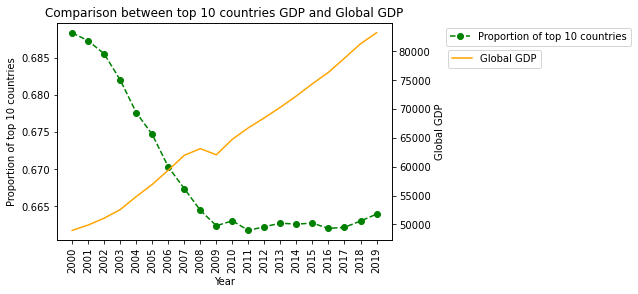

In [24]:
prop = []
glob = []
for i in df_gdp.columns[1:]:
    #print(i)
    df_gdp_i = df_gdp.loc[:,['country',i]]
    gdp_i = df_gdp_i.iloc[:,1]
    large = gdp_i.nlargest(10)
    prop_i = large.sum()/gdp_i.sum()
    prop.append(prop_i)
    glob.append(gdp_i.sum())
print(prop)
xtk_label = df_gdp.columns[1:].astype(int)


fig, axes0 = plt.subplots()

axes0.plot(np.arange(20),prop ,'go--', label = "Proportion of top 10 countries")
axes1 = axes0.twinx()
axes1.plot(glob, label = "Global GDP" , color = 'orange')
axes0.set_xticks(np.arange(20))
axes0.set_xlabel('Year')
axes0.set_ylabel('Proportion of top 10 countries')
axes1.set_ylabel('Global GDP')
axes0.set_xticklabels(xtk_label , rotation = 90)
axes0.set_title('Comparison between top 10 countries GDP and Global GDP')
axes0.legend(bbox_to_anchor = (1.73,1))
axes1.legend(bbox_to_anchor = (1.46,0.9));

Since the contributions of top 10 countries to global GDP is on decline, meaning apart from dominent 10 largest contributors there are other countries to which are contrbuting to world economy share. This is a good sign since many other countries are performing and contributing to world economy.

<a id='rq2'></a>
### Research Question 2: Understanding top 10 country's population% in 2019 vs gdp % in 2019 

In [25]:
df_pop = pd.read_csv('population_total_clean.csv')
df_pop_2019 = df_pop.loc[:,['country','2019']]
df_pop_2019

,country,2019
0,Afghanistan,38000000
1,Albania,2880000
2,Algeria,43100000
3,Andorra,77100
4,Angola,31800000
...,...,...
190,Venezuela,28500000
191,Vietnam,96500000
192,Yemen,29200000
193,Zambia,17900000


In [26]:
df_gdp = pd.read_csv('gdp_clean.csv')
df_gdp_2019 = df_gdp.loc[:,['country','2019']]

Merging gdp_2019 and pop_2019 datasets:
> Step 1 - Merge would be done basis country column, thus we need to rename 2019 columns 

In [27]:
df_pop_2019.rename(columns = lambda x: x[:10]+'_pop' , inplace = True)
df_pop_2019

,country_pop,2019_pop
0,Afghanistan,38000000
1,Albania,2880000
2,Algeria,43100000
3,Andorra,77100
4,Angola,31800000
...,...,...
190,Venezuela,28500000
191,Vietnam,96500000
192,Yemen,29200000
193,Zambia,17900000


In [28]:
df_gdp_2019.rename(columns = lambda x: x[:10]+'_gdp' , inplace = True)
df_gdp_2019

,country_gdp,2019_gdp
0,Afghanistan,21.700
1,Albania,14.900
2,Algeria,203.000
3,Andorra,3.540
4,Angola,98.800
...,...,...
181,Vanuatu,0.862
182,Vietnam,201.000
183,Yemen,18.000
184,Zambia,29.600


> Step 2 - Perform inner merge with gdp data on left

In [29]:
gdp_pop = pd.merge(df_gdp_2019, df_pop_2019, how = 'inner', left_on = 'country_gdp', right_on = 'country_pop' )
gdp_pop

,country_gdp,2019_gdp,country_pop,2019_pop
0,Afghanistan,21.700,Afghanistan,38000000
1,Albania,14.900,Albania,2880000
2,Algeria,203.000,Algeria,43100000
3,Andorra,3.540,Andorra,77100
4,Angola,98.800,Angola,31800000
...,...,...,...,...
181,Vanuatu,0.862,Vanuatu,300000
182,Vietnam,201.000,Vietnam,96500000
183,Yemen,18.000,Yemen,29200000
184,Zambia,29.600,Zambia,17900000


> Dropping the redundant country column and renaming the other country column name from country_gdp to country

In [30]:
gdp_pop.drop(columns ='country_pop', axis = 1 , inplace = True)
gdp_pop.rename(columns ={'country_gdp':'country'} , inplace = True)
gdp_pop

,country,2019_gdp,2019_pop
0,Afghanistan,21.700,38000000
1,Albania,14.900,2880000
2,Algeria,203.000,43100000
3,Andorra,3.540,77100
4,Angola,98.800,31800000
...,...,...,...
181,Vanuatu,0.862,300000
182,Vietnam,201.000,96500000
183,Yemen,18.000,29200000
184,Zambia,29.600,17900000


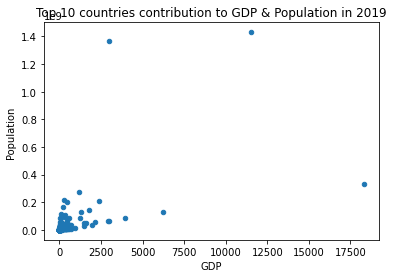

In [48]:
ax = gdp_pop.plot(x = '2019_gdp',y= ['2019_pop'] ,kind = 'scatter' , 
                   title = 'Top 10 countries contribution to GDP & Population in 2019')
ax.set(xlabel = 'GDP', ylabel = 'Population ');

In [31]:
# World gdp in 2019
world_gdp_2019 = gdp_pop['2019_gdp'].sum()
print('World GDP in 2019 is %s' %(world_gdp_2019))

World GDP in 2019 is 83231.5569


In [32]:
# Calculating percentage share of each county to world gdp

gdp_pop['2019_gdp_%'] = gdp_pop['2019_gdp']/world_gdp_2019  *100

In [33]:
# World population in 2019
world_pop_2019 = gdp_pop['2019_pop'].sum()
print('World population in 2019 is %s' %(world_pop_2019))


World population in 2019 is 7572113700


In [34]:
# Calculating percenatge share of each county to world population

gdp_pop['2019_pop_%'] = gdp_pop['2019_pop']/world_pop_2019  *100
gdp_pop['2019_pop_%']

0      0.501841
1      0.038034
2      0.569194
3      0.001018
4      0.419962
         ...   
181    0.003962
182    1.274413
183    0.385625
184    0.236394
185    0.192813
Name: 2019_pop_%, Length: 186, dtype: float64

In [35]:
# Productivity factor = gdp% / pop%
gdp_pop['prod_factor']= gdp_pop['2019_gdp_%']/gdp_pop['2019_pop_%']

In [36]:
# Extracting rows with top 10 gdp contributors to the world economy in 2019
gdp_pop_top10 = gdp_pop.sort_values(by = '2019_gdp_%' , ascending = False).head(10)
gdp_pop_top10

,country,2019_gdp,2019_pop,2019_gdp_%,2019_pop_%,prod_factor
178,United States,18300.0,329000000,21.986853,4.344890,5.060394
35,China,11500.0,1430000000,13.816875,18.885084,0.731629
82,Japan,6210.0,127000000,7.461112,1.677207,4.448535
62,Germany,3960.0,83500000,4.757811,1.102730,4.314573
58,France,2970.0,65100000,3.568358,0.859734,4.150540
74,India,2960.0,1370000000,3.556343,18.092702,0.196562
177,United Kingdom,2920.0,67500000,3.508285,0.891429,3.935575
23,Brazil,2350.0,211000000,2.823448,2.786540,1.013245
80,Italy,2150.0,60600000,2.583155,0.800305,3.227713
30,Canada,1940.0,37400000,2.330847,0.493918,4.719101


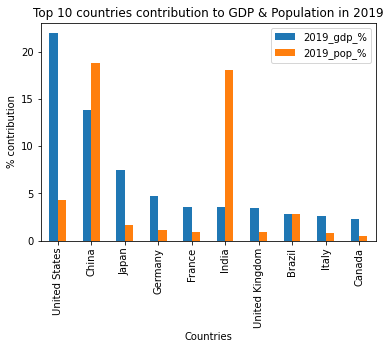

In [37]:
ax = gdp_pop_top10.plot(x = 'country',y= ['2019_gdp_%','2019_pop_%'] ,kind = 'bar' , 
                   title = 'Top 10 countries contribution to GDP & Population in 2019')
ax.set(xlabel = 'Countries', ylabel = '% contribution');

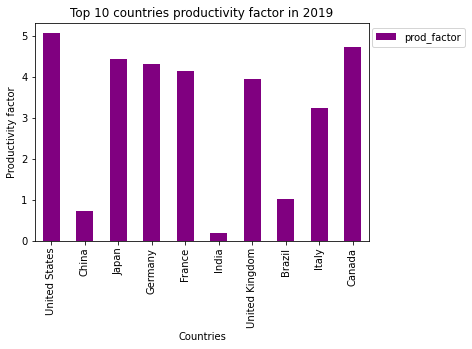

In [39]:
ax = gdp_pop_top10.plot(x = 'country',y= ['prod_factor'] ,kind = 'bar' , 
                   title = 'Top 10 countries productivity factor in 2019' , color = 'purple')
ax.set(xlabel = 'Countries', ylabel = 'Productivity factor')
ax.legend(bbox_to_anchor = (1.3,1));

Among the top 10 countries GDP wise in 2019,there are countries like United States, Canada, Japan, Germany which have better productivity factor.Productivity factor is defined as the ratio of percent contribution of GDP to world GDP and percent contribution of Population  to world Population.
China & India though are at rank 2 and 6 respectively GDP wise but there productivity factor is far less.

<a id='rq3'></a>
### Research Question 3: Understanding Relationship between GDP and Life expectancy in United States from year 2000-2019

In [40]:
# Extracting life expectancy data for United States

df_le = pd.read_csv('life_expectancy_clean.csv')
le_us = df_le.query('country == ["United States"]')
le_us

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
178,United States,76.9,76.9,77.0,77.2,77.5,77.6,77.8,78.0,78.2,...,78.7,78.8,78.9,78.9,78.9,78.8,78.6,78.6,78.6,78.6


In [41]:
# Extracting gdp data for United States

gdp_us = df_gdp.query('country == ["United States"]')
gdp_us

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
178,United States,12600.0,12700.0,13000.0,13300.0,13800.0,14300.0,14700.0,15000.0,15000.0,...,15000.0,15200.0,15600.0,15900.0,16200.0,16700.0,17000.0,17300.0,17900.0,18300.0


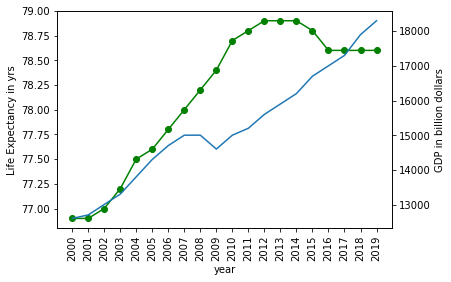

In [42]:
le = []
gdp = []
x_axis = le_us.columns[1:]
for i in le_us.columns[1:]:
    le.append(le_us.loc[:,i].values[0])
    gdp.append(gdp_us.loc[:,i].values[0])
    
fig, ax0 = plt.subplots()
ax0.plot(x_axis, le, 'go-')
ax0.set_xticklabels(x_axis , rotation = 90)
ax0.set(xlabel = 'year' , ylabel = 'Life Expectancy in yrs' )
ax1 = ax0.twinx()
ax1.plot(x_axis, gdp)
ax1.set( ylabel = 'GDP in billion dollars' );


Typically as the GDP in united states increases, Life expectancy(years) also increases, this might be due to more investment in healthcare, resulting into better life expectancy.

<a id='rq4'></a>
### Research Question 4: Understanding Relationship between GDP and Unemployment  in United States from year 2000-2019

In [43]:
# Extracting Unemployment data for United States

df_unemp = pd.read_csv('unemp_rate_clean.csv')
unemp_us = df_unemp.query('country == ["United States"]')
unemp_us

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
115,United States,0.00285,0.00351,0.00644,0.00779,0.00707,0.00593,0.00498,0.00494,0.00688,0.0167,0.0227,0.021,0.0179,0.015,0.0113,0.00829,0.00705,0.00605


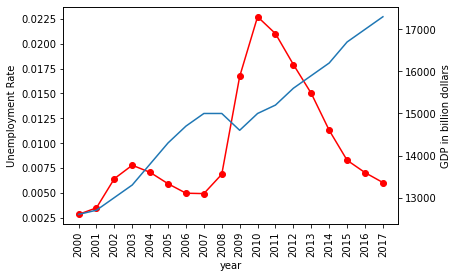

In [44]:
unemp = []
gdp = []
x_axis = unemp_us.columns[1:]
for i in unemp_us.columns[1:]:
    unemp.append(unemp_us.loc[:,i].values[0])
    gdp.append(gdp_us.loc[:,i].values[0])
    
fig, ax0 = plt.subplots()
ax0.plot(x_axis, unemp, 'ro-')
ax0.set_xticklabels(x_axis , rotation = 90)
ax0.set(xlabel = 'year' , ylabel = 'Unemployment Rate' )
ax1 = ax0.twinx()
ax1.plot(x_axis, gdp)
ax1.set( ylabel = 'GDP in billion dollars' );

Above trend clearly shows that the relationship between GDP and unemployment rate is inverse in general. This might deviate a little pertainig to various socio-economic & political factors. But normally this would always have inverse relationship.

In [49]:
df_pop_2019

,country_pop,2019_pop
0,Afghanistan,38000000
1,Albania,2880000
2,Algeria,43100000
3,Andorra,77100
4,Angola,31800000
...,...,...
190,Venezuela,28500000
191,Vietnam,96500000
192,Yemen,29200000
193,Zambia,17900000


<a id='conclusions'></a>
## Conclusions

### Results of research questions:
> Research question 1: Since the contributions of top 10 countries to global GDP is on decline, meaning apart from dominent 10 largest contributors there are other countries to which are contrbuting to world economy share. This is a good sign since many other countries are performing and contributing to world economy.

> Research question 2: Among the top 10 countries GDP wise in 2019,there are countries like United States, Canada, Japan, Germany which have better productivity factor.Productivity factor is defined as the ratio of percent contribution of GDP to world GDP and percent contribution of Population to world Population. China & India though are at rank 2 and 6 respectively GDP wise but there productivity factor is far less.

> Research question 3: As the GDP in US is increasing, life expectancy has also increased, this may be because of more investment in healthcare

> Research question 4: The relationship between GDP and unemployment rate is inverse in general. This might deviate a little pertainig to various socio-economic & political factors.

### Limitations:
> GDP has more recent data till year 2019, while there are many other factors that do not have upto date. Hence for having clear one-to-one comparison data for GDP is trimmed according to the factor it is compared against. Hence some comparisons will be tilll 2017 & some till 2019

> For a span of 19 years if data has nulls for more than 5 times , that country row is omitted so that we have significant contributors to the world statistics present



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project2-Investigating Gapminder dataset.ipynb'])

0